<a href="https://colab.research.google.com/github/Rogerio-mack/MDJ/blob/main/EADMDJ_A7_NaoSupervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"> EAD <b>Mineração de Dados para Jogos </b> </font></h1>

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">A7 Modelos Não Supervisionados: Clusterização</font></h1>
<hr>

# **IMPORTANTE:** Antes de começar 

Execute a célula final desse LAB SET UP. Ela irá **inicializar** o seu ambiente com rotinas que são empregadas para essa apresentação inicial. Você pode procurar no índice, a seção encontra-se antes dos conteúdos de Clusterização Hierárquica.

 # **Clusterização**
 
**Clusterização** é uma tarefa de análise de dados, assim como **Classificação**, e **Regressão**, podendo ser empregados vários modelos para se obter a clusterização, como o *Kmeans* (que veremos aqui), métodos hierárquicos, `dbscan` etc.

Diferentemente dos modelos anteriores a **Clusterização** em geral emprega modelos **Não Supervisionados**.

### **APRENDIZADO SUPERVISIONADO**

> Tarefa: **Regressão**
>> Modelo: Linear, Polinomial, Exponencial etc.

> Tarefa: **Classificação**
>> Modelo: Knn, Árvore de Decisão, Regressão Logística, Redes Neurais etc.

### **APRENDIZADO NÃO SUPERVISIONADO**

> Tarefa: **Clusterização**
>> Modelo: Kmeans, Hierárquico, `dbscan`

 # **Aprendizado Não Supervisionado**
 
Diferentemente do Aprendizado Supervisionado, no Aprendizado não Supervisionado **não há um Conjunto de Treinamento**, e portanto não haverá também um Conjunto de Testes.

O aprendizado feito sobre os dados, capturando algum padrão dos dados, mas sem uma `resposta`, como um valor ou classe, como você encontrou no Aprendizado Supervisionado. Neste sentido dizemos que o **Aprendizado não Supervisionado é mais Analítico que Preditivo**.



## Você identifica quantos grupos de dados na figura abaixo?

Pronto, você acaba de realizar um **Aprendizado não Supervisionado**.





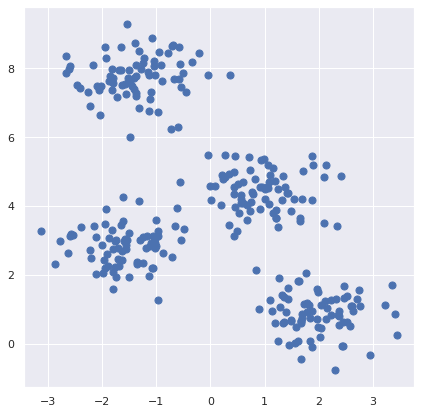

In [ ]:
sns.set()
f = plt.figure(figsize=(7,7))
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

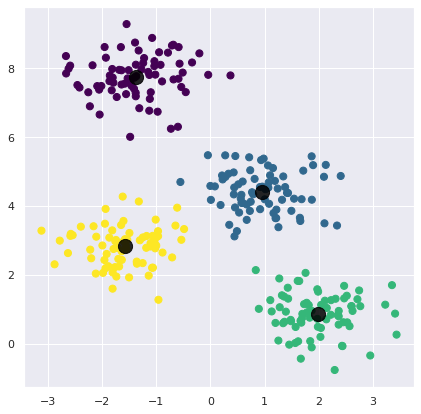

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

f = plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.85);

Você talvez tenha achado essa tarefa fácil mas imagine, por exemplo, que você tenha um conjunto 40.000 reclamações de Clientes (Lab T10) com mais de 30 atributos. Você seria capaz de identificar potenciais grupos de reclamações? 

Assim a **clusterização**, a tarefa de encontrar grupos de dados que guardam semelhanças entre si, encontra um grande número de aplicações como Segmentação de Clientes, Sistemas de Recomendação de Produtos ou Análises de grupos de Clientes, Produtos, Fornecedores etc. para tomada de decisão.



# **CUIDADO:**  **Clusterização** $\not=$ **Classificação**

Um erro comum é confundirmos **Clusterização** com **Classificação**. 

Suponha por exemplo um conjunto de dados de Empréstimos onde eles são classificados entre *Tx Padrão* e *Tx Especial* (juros mais baixos). Essa é a classificação dos dados. Mas, se você buscar com alguma técnica "grupos de Empréstimos" que guardem semelhanças entre si, talvez você encontre grupos  que exibem um outra relação dos dados completamente diferente de *Tx Padrão* e *Tx Especial*. Por exemplo, grupos de Empréstimos para Bens de Consumo para Jovens, Empréstimos para Capital de Giro e Outros, em todos eles havendo seus percentuais de *Tx Padrão* e *Tx Especial*. 

Você ainda não vai empregar essa informação para *predizer* novos casos, mas talvez tomar decisões sobre esses grupos, como fazer uma campanha para educação de Jovens sobre o Empréstimo Consciente ou uma redução das Taxas para atrair mais Empréstimos de Capital de Giro.

# **Kmédias**

O Kmédias sistematiza a forma que você 'observou' diferentes grupos de dados em nosso exemplo inicial.

É um algoritmo que busca de forma iterativa (aproximações sucessivas) minimizar dois objetivos:

$$ min_{c} J_{in} = \sum_{i,k} || x_i - c_k ||^2 $$ 
$$ max_{c} J_{out} = \sum_{i,k} || c_i - c_k ||^2 $$ 

Minimizar as distâncias intragrupos e maximizar as distâncias entre grupos.

\* Aqui empregaremos unicamente a função distância Euclidiana embora outras funções distância possam ser empregadas.

# Algoritmo Kmeans

```
  1. Seleciona k pontos aleatoriamente como centros de cluster
  2. Atribui elementos ao centro de cluster mais próximo de acordo com alguma função distância (euclidiana, por exemplo)
  3. Calcula o novo centróide a partir da média de todos os elementos em cada cluster
  4. Repite as etapas 2 e 3 até que os mesmos pontos sejam atribuídos a cada cluster em rodadas consecutivas

```
Veja o exemplo abaixo em uma dimensão.


# **Kmeans** *1D*

Vamos separar um grupo de visitantes por idade para a visita no museu entre dois monitores?

[array([15, 15, 16, 19, 19, 20, 20, 21, 22, 28, 35, 40, 41, 42, 43, 44, 60,
       61, 65])]
[[16]
 [22]]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[16.8       ]
 [38.71428571]]
[[15 15 16 19 19 20 20 21 22 28 35 40 41 42 43 44 60 61 65]]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[18.55555556]
 [45.9       ]]
[[15 15 16 19 19 20 20 21 22 28 35 40 41 42 43 44 60 61 65]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[[19.5       ]
 [47.88888889]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

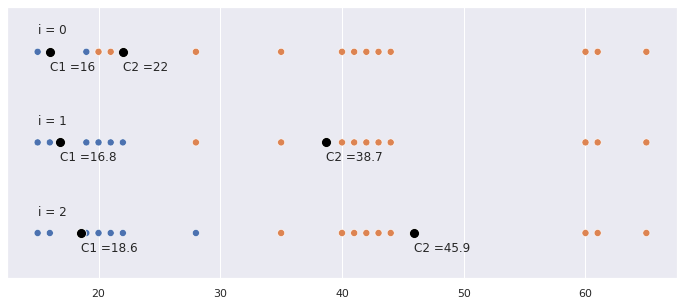

In [ ]:
X = pd.DataFrame({'Age':[15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65]})

kmeansL(X,k=2,pos=[2,8])


# **Kmeans** *2D*

Vamos agora ver o mesmo procedimento em duas dimensões para um grupo de dados aleatório.

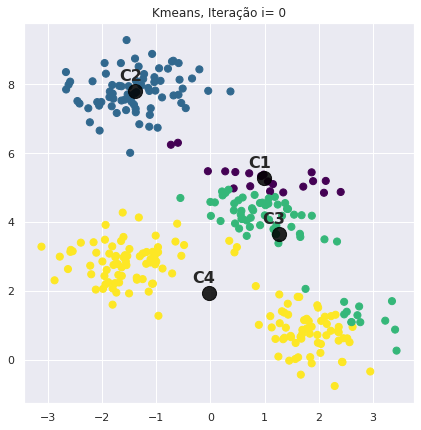

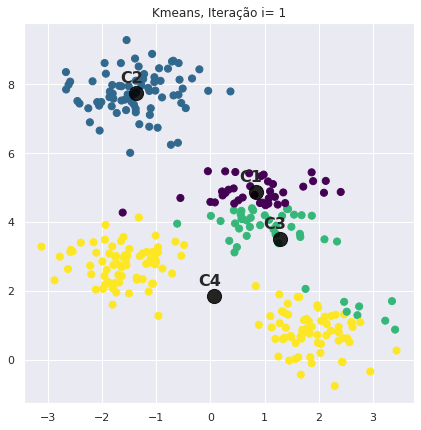

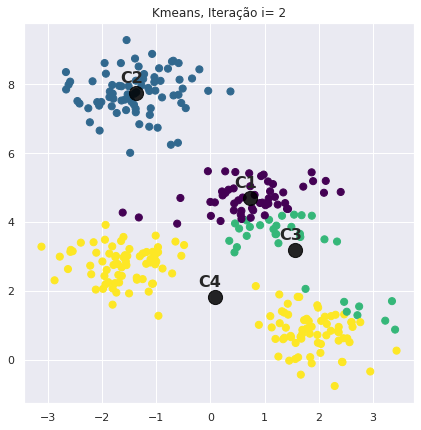

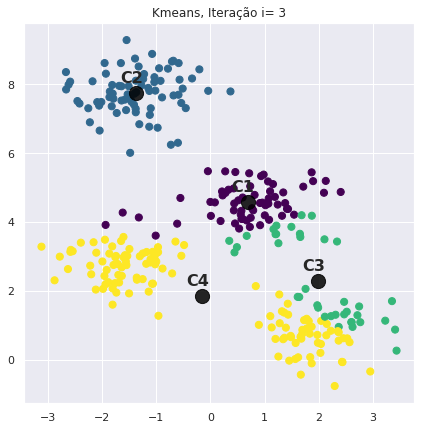

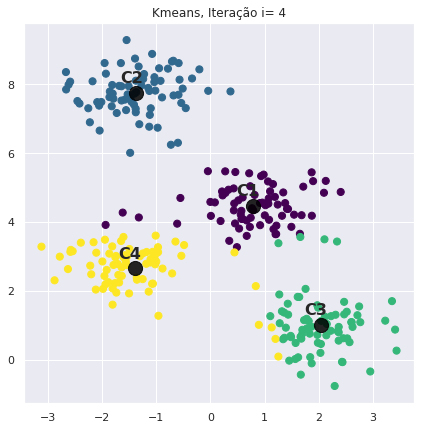

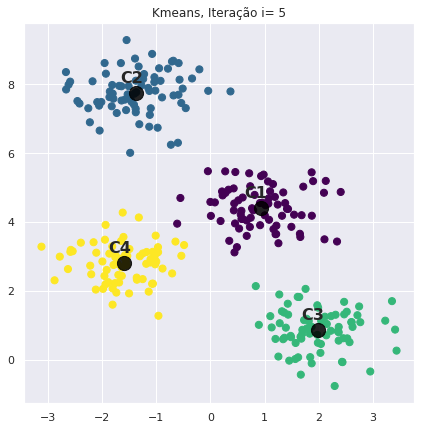

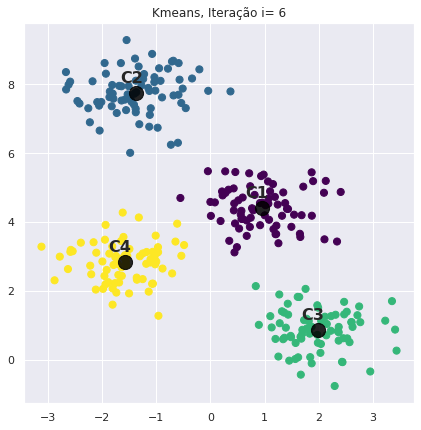

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
centers, labels = find_clusters(X, 4)

## **Case**: Segmentando Estados para Políticas e Campanhas de não Violência

Compare verifique que a estrutura de uso dos modelos é a mesma. 

URL: https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv

Abstract: Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.
http://archive.ics.uci.edu/ml/datasets/communities+and+crime

## Explorando os dados


In [ ]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()
df.isnull().sum()
df.shape

df.describe()



,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Rescale dos dados

Como os dados encontram-se em escalas diferentes e o kmeans é sensível a distância, vamos reescalar os dados empregando a função `StandardScaler` (T10 Lab).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X_matrix = scaler.transform(df)
temp = df.index
df = pd.DataFrame(X_matrix,columns=df.columns)
df.index = temp
df.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


# Separando em 4 Clusters

In [ ]:
# Dados
X = df[['Murder','UrbanPop']] 

# Declara o modelo
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Calcula
clf.fit(X)

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 2 1 2 1 1 0 0 1 2 0 3 1 0 3 0 2 2 3 1 0 1 0 2 1 3 0 1 3 1 1 1 2 3 0 0 0
 0 0 2 3 2 1 0 3 0 0 3 0 0]
[[-0.61181872  0.41593144]
 [ 0.65574179  0.95007158]
 [ 1.23662525 -0.87513091]
 [-1.0975732  -1.23182081]]


In [ ]:
print(pd.concat([df.reset_index(),pd.DataFrame(labels)], axis=1))

             index    Murder   Assault  UrbanPop      Rape  0
0          Alabama  1.255179  0.790787 -0.526195 -0.003451  2
1           Alaska  0.513019  1.118060 -1.224067  2.509424  2
2          Arizona  0.072361  1.493817  1.009122  1.053466  1
3         Arkansas  0.234708  0.233212 -1.084492 -0.186794  2
4       California  0.281093  1.275635  1.776781  2.088814  1
5         Colorado  0.025976  0.402909  0.869548  1.883901  1
6      Connecticut -1.040880 -0.736484  0.799761 -1.092723  0
7         Delaware -0.437875  0.815030  0.450825 -0.585834  0
8          Florida  1.765415  1.990786  1.009122  1.150530  1
9          Georgia  2.229265  0.487757 -0.386621  0.492653  2
10          Hawaii -0.577030 -1.512241  1.218484 -0.111300  0
11           Idaho -1.203228 -0.615272 -0.805344 -0.758392  3
12        Illinois  0.605789  0.948363  1.218484  0.298525  1
13         Indiana -0.136372 -0.700121 -0.037685 -0.025021  0
14            Iowa -1.295998 -1.391029 -0.595982 -1.071153  3
15      

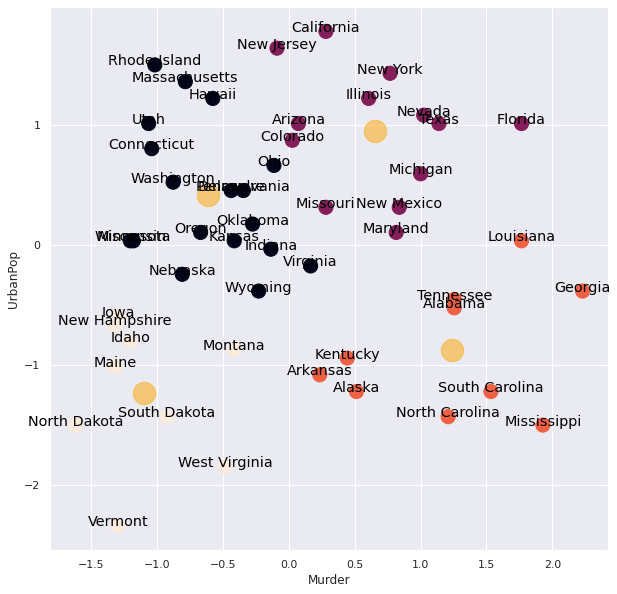

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 500 , c = 'orange' , alpha = 0.5)

for line in range(0,df.shape[0]):
     plt.text(df.Murder[line], df.UrbanPop[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Definindo o número ideal de Clusters

Assim como nos modelos anteriores é importante 'medirmos' o resultado do nosso modelo, seja para sua escolha ou ajuste.

Vamos empregar aqui apenas dois critérios, a **regra do cotovelo** e a **equidade dos grupos**. Existem várias outras métricas para escolha do número de agrupamentos, como por exemplo a técnica de `Silhouette`, mas que não trataremos aqui. 

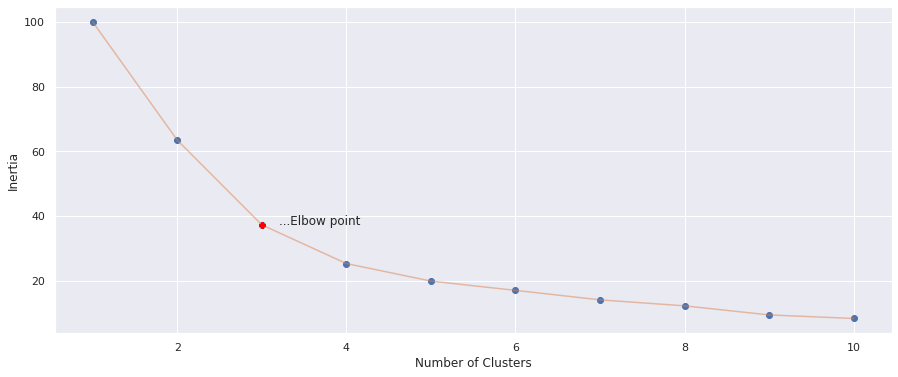

In [ ]:
inertia = []
for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()   

# Recalculando os grupos

In [ ]:
# Dados
X = df[['Murder','UrbanPop']] 

# Declara o modelo
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Calcula
clf.fit(X)

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 0 1 0 0 0 0 1 1 0 2 0 0 2 0 1 1 2 1 0 1 2 1 0 2 2 0 2 0 1 0 1 2 0 0 0
 0 0 1 2 1 0 0 2 1 0 2 2 2]
[[-0.16588978  0.84417079]
 [ 1.12993965 -0.46106046]
 [-1.02303997 -0.89660388]]


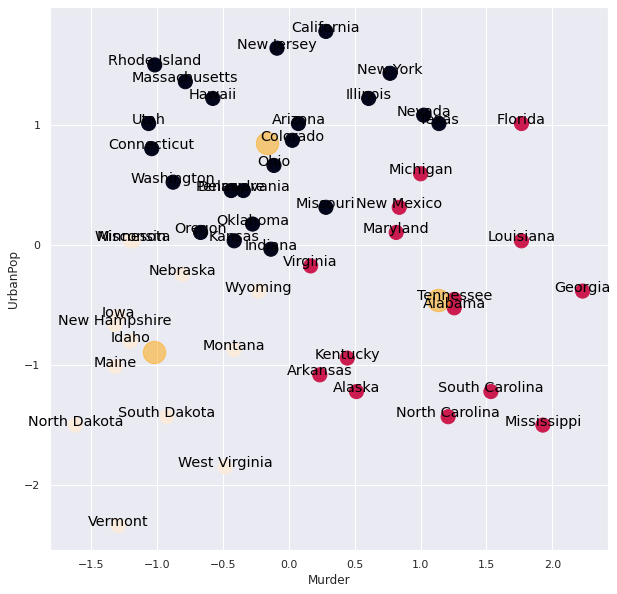

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 500 , c = 'orange' , alpha = 0.5)

for line in range(0,df.shape[0]):
     plt.text(df.Murder[line], df.UrbanPop[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Empregando todo o conjunto de dados

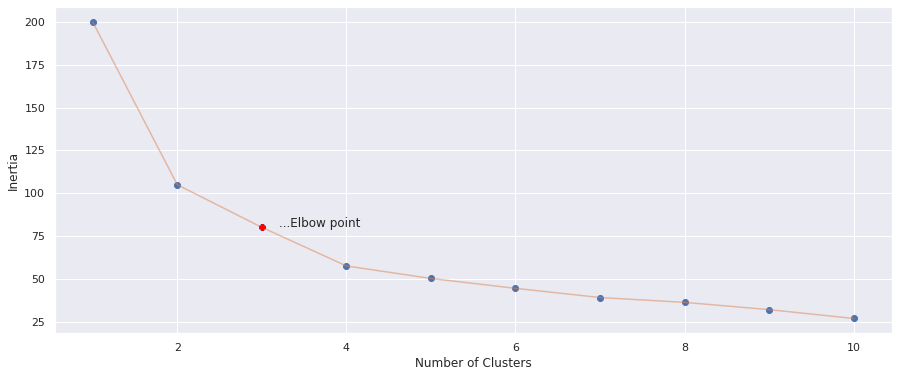

In [ ]:
# Dados
X = df

inertia = []
for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()   

In [ ]:
# Dados
X = df

# Declara o modelo
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Calcula
clf.fit(X)

# Resultados
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 2 1 1 0 0 1 1 0 2 1 0 2 0 2 1 2 1 0 1 2 1 1 2 2 1 2 0 1 1 1 2 0 0 0
 0 0 1 2 1 1 0 2 0 0 2 2 0]
[[-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.88515915 -1.0213324  -0.94990286 -0.92016524]]


Não exibimos os dados aqui graficamente. Por quê?

In [ ]:
df['cluster'] = labels
print(df)

                  Murder   Assault  UrbanPop      Rape  cluster
Alabama         1.255179  0.790787 -0.526195 -0.003451        1
Alaska          0.513019  1.118060 -1.224067  2.509424        1
Arizona         0.072361  1.493817  1.009122  1.053466        1
Arkansas        0.234708  0.233212 -1.084492 -0.186794        2
California      0.281093  1.275635  1.776781  2.088814        1
Colorado        0.025976  0.402909  0.869548  1.883901        1
Connecticut    -1.040880 -0.736484  0.799761 -1.092723        0
Delaware       -0.437875  0.815030  0.450825 -0.585834        0
Florida         1.765415  1.990786  1.009122  1.150530        1
Georgia         2.229265  0.487757 -0.386621  0.492653        1
Hawaii         -0.577030 -1.512241  1.218484 -0.111300        0
Idaho          -1.203228 -0.615272 -0.805344 -0.758392        2
Illinois        0.605789  0.948363  1.218484  0.298525        1
Indiana        -0.136372 -0.700121 -0.037685 -0.025021        0
Iowa           -1.295998 -1.391029 -0.59

# Tamanho dos Clusters

Verifique ainda se os grupos formados não levam a um grupo excessivamente grande (90% dos dados por exemplo) ou pequeno (1% dos dados por exemplos). 

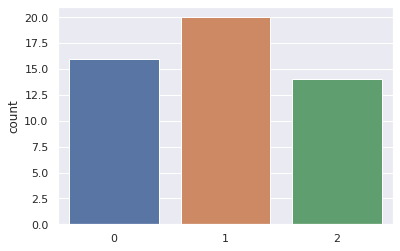

In [ ]:
df.cluster.value_counts()
sns.countplot(labels)

# Caracterizando os Grupos

Esses grupos, diferentemente de um processo de classificação (*Tx Padrão*, *Tx Especial*) não são caracterizados por um *rótulo*. Mas você pode explorar esses grupos, por exemplo verificando os valores médios, buscando características comuns para que vocês rotula-los e, portanto, caracteriza-los melhor. 

No nosso exemplo anterior, você só pode identificar que existem grupos de Empréstimos para Bens de Consumo para Jovens e Empréstimos para Capital de Giro e Outros, observando por exemplo os produtos, finalidade do empréstimo e idade média dos clientes de cada grupo.

In [ ]:
df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,-0.494407,-0.386484,0.581676,-0.264310
1,1.015137,1.024120,0.199591,0.855564
2,-0.885159,-1.021332,-0.949903,-0.920165


In [ ]:
g = pd.DataFrame( df.groupby('cluster').mean() ).reset_index()

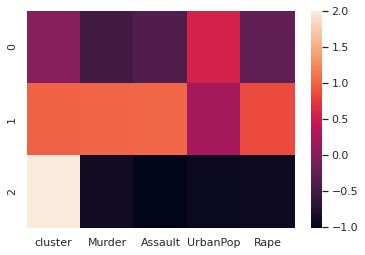

In [ ]:
sns.heatmap(g)

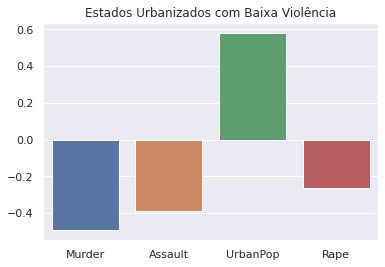

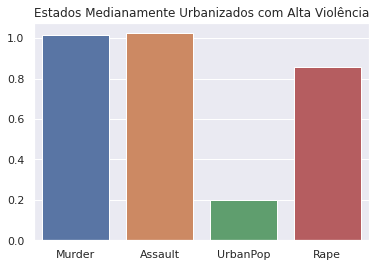

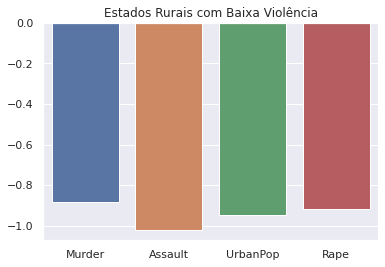

In [ ]:
sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.title('Estados Urbanizados com Baixa Violência')
plt.show()
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.title('Estados Medianamente Urbanizados com Alta Violência')
plt.show()
sns.barplot(data=g[g.cluster==2].drop(columns='cluster'))
plt.title('Estados Rurais com Baixa Violência')
plt.show()

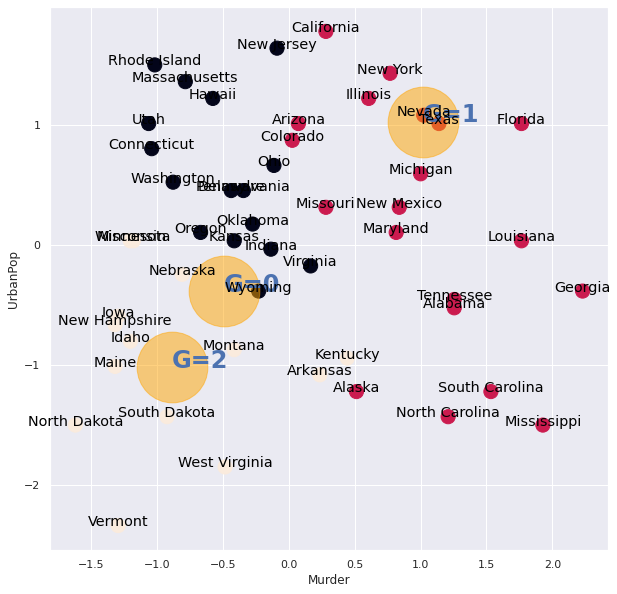

In [ ]:
f = plt.figure(figsize=(10,10))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = df , c = df.cluster , s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 5000 , c = 'orange' , alpha = 0.5)
plt.text(centroids[0 , 0] , centroids[0 , 1] , 'G=0', fontsize=24, fontweight='bold', color='b')
plt.text(centroids[1 , 0] , centroids[1 , 1] , 'G=1', fontsize=24, fontweight='bold', color='b')
plt.text(centroids[2 , 0] , centroids[2 , 1] , 'G=2', fontsize=24, fontweight='bold', color='b')

for line in range(0,df.shape[0]):
     plt.text(df.Murder[line], df.UrbanPop[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

## **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
#
# set up environment T11
#

#
# import basics
# 

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 
sns.set()

# import plotly as py
# import plotly.graph_objs as go
from sklearn.cluster import KMeans

# Linear
#-------------------------------------------------------------------------------

# a little bit dirty here... just for this case...
from scipy.spatial import distance
def kmeansL(X,k=2,max_iterations=100,pos=[2,8]):
    f = plt.figure(figsize=(12, 5))
    # plt.axis('off')
    plt.yticks([])
    plt.ylim([-2.5,0.5])
    # plt.xlim([0,70])
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.array(pos) # np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    print(list(X.T))
    print(centroids)
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    print(P)
    zeros = np.full((len(X)), 0, dtype=int)
    sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
    sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=100)
    plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
    plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
    plt.text(15,zeros[0:1]+0.2,'i = ' + str(0))
    for j in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        print(centroids)
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
        print(X.T)
        print(P)
        zeros = np.full((len(X)), -(j+1) , dtype=int)
        sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
        sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=100)
        plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
        plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
        plt.text(15,zeros[0:1]+0.2,'i = ' + str(j+1))
        
    return P # , X, centroids

'''
P, PP, centroids = kmeansL(X,k=2,pos=[2,8])
P, PP, centroids = kmeansL(X,k=2,pos=[2,18])
P, PP, centroids = kmeansL(X,k=2,pos=[5,18])
P, PP, centroids = kmeansL(X,k=2,pos=[12,15])
'''

# Spacial
#-------------------------------------------------------------------------------

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    j=0 

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        f = plt.figure(figsize=(7, 7))
        plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.85);

        plt.text(centers[0, 0]-0.3, centers[0, 1]+0.3, 'C1', fontsize=16, fontweight='bold')
        plt.text(centers[1, 0]-0.3, centers[1, 1]+0.3, 'C2', fontsize=16, fontweight='bold')
        plt.text(centers[2, 0]-0.3, centers[2, 1]+0.3, 'C3', fontsize=16, fontweight='bold')
        plt.text(centers[3, 0]-0.3, centers[3, 1]+0.3, 'C4', fontsize=16, fontweight='bold')
        
        plt.title('Kmeans, Iteração i= ' + str(j))
        j=j + 1
        
        plt.show()
    return centers, labels

# centers, labels = find_clusters(X, 4)

print('T11 Set Up completed!')


T11 Set Up completed!


# **Clusterização Hierárquica**

---



**Clustering hierárquico** (ou análise de cluster hierárquico) é um método de análise de cluster que busca construir uma hierarquia de clusters. Existem duas estratégias normalmente empregadas: 

> **Aglomerativo**: Esta é uma abordagem "de baixo para cima", cada observação começa em seu próprio agrupamento, e pares de agrupamentos são organizados a medida que sobe a hierarquia.

> **Divisivo**: Esta é uma abordagem "de cima para baixo", todas as observações começam em um cluster, e as divisões são realizadas recursivamente à medida que se desce na hierarquia dos dados.

Os resultados do agrupamento hierárquico podem ser então apresentados em um **dendrograma**.



<img src="http://meusite.mackenzie.br/rogerio/hclust1.png" width=800, align="center">

# Funções Distância

Existem várias funções distância que podem ser aplicadas, não só aqui mas também nos modelos anteriores que estudamos (*knn*, *kmeans* etc.). A distância euclidiana é a mais aplicada, mas algumas algumas encontram maior uso em contextos específicos como a distância de **Hamming** para dados binários ou a distância **coseno** para análise de dados de documentos. 

Uma função é uma função distância se atende a 4 propriedades:

$$ d(x,y) \ge 0$$
$$ d(x,x) = 0$$
$$ d(x,y) = d(y,x)$$
$$ d(x,y) \le d(x,z) + d(z,y)$$

## Algumas funções distância empregadas em Ciência de Dados
Veja aqui algumas funções distância:

Distância euclidiana ${\displaystyle \| ab \| _ {2} = {\sqrt {\sum _ {i} (a_ {i} -b_ {i}) ^ {2}}}} $

Distância euclidiana quadrada ${\displaystyle \| ab \| _ {2} ^ {2} = \sum _ {i} (a_ {i} -b_ {i}) ^ {2}} $

Distância de Manhattan ${\displaystyle \| ab \| _ {1} = \sum _ {i} | a_ {i} -b_ {i} |}$

Distância máxima ${\displaystyle \| ab \| _ {\infty} = \max _ {i} | a_ {i} -b_ {i} |}$

Distância de Mahalanobis ${\displaystyle {\sqrt {(ab) ^ {\top} S ^ {- 1} (ab)}}}$  onde S é a matriz de covariância

# Distância de Hamming para Strings

```
def hamming_distance(s1, s2):
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))
```
# Distância Cosseno
Aplicada para problemas em geral de busca e análise de documentos com representação vetorial (*bow*, *tf-idf* etc.).

$$ A.B = \|A\| \|B\| cos(\theta)$$

Então definimos a *similaridade* de dois vetores como:

$$ S(A,B) = cos(\theta) = \frac{A.B}{\|A\| \|B\|} $$

E a distância:

$$ d(A,B) = 1 - S(A,B)$$








# Definindo os Clusters

Construído o Dendograma, a partir da matriz de distância dos elementos, a definição dos Clusters pode ser feita estabelecendo-se um *ponto* de corte no dendograma que é a distância máxima que os elementos terão dentro de um agrupamento.


<img src="http://meusite.mackenzie.br/rogerio/hclust2.png" width=400, align="center">

A definição do melhor número de agrupamentos segue algumas métricas e técnicas á exemplo do que vimos no k-Médias.

# Linkage

A função distância está bem definida para distância de dois elementos. Mas ainda não definimos a distância de um elemento a um grupo. O critério de ligação determina a distância entre conjuntos de observações e ou entre conjuntos e um elemento.

Alguns dos critérios de ligação comumente empregados são: 


1. Complete linkage

$$d(A,B) = \{\max \, d (a, b): a \in A, \, b \in B \, \}$$

2. Single linkage

$$d(A,B) = \{\min \, d (a, b): a \in A, \, b \in B \, \}$$

3. Average linkage

$$d(A,B) = {\displaystyle {\frac {1} {| A | \cdot | B |}} \sum _ {a \in A} \sum _ {b \in B} d (a, b)} $$


Importante notar que o tipo de linkage empregado altera a formação dos agrupamentos além de ter impacto sobre o desempenho do processamento (ver seção opcional abaixo).

Abaixo, diferentes formações para `single`e `complete` linkage.


<img src="http://meusite.mackenzie.br/rogerio/hclust3.png" width=650, align="center">

# Referências
Você pode encontrar mais detalhes sobre esses métodos em:

https://scikit-learn.org/stable/modules/clustering.html

https://online.stat.psu.edu/stat555/node/85/




# Caso: **Wholesale Customer Data** 

O data set tem informações de um distribuidore seus clientes e inclui os gastos anuais para diferentes produtos. 

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers





In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Normalizando os dados

Escolha um. https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Aqui, será indiferente empregar o `scale` ou o `normalize`. 

In [ ]:
from sklearn import preprocessing 
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
from sklearn import preprocessing 
df_scaled = preprocessing.normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


# Aglomerative Clustering

Vamos fazer uma clusterização em 2 grupos aqui. Mais adiante discutimos uma métrica para se chegar a esse número.




In [ ]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single') 
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 

clf.fit(df_scaled)

# Resultados
labels = clf.labels_
print(labels)



[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1]


In [ ]:
df['cluster'] = labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


# Dendograma

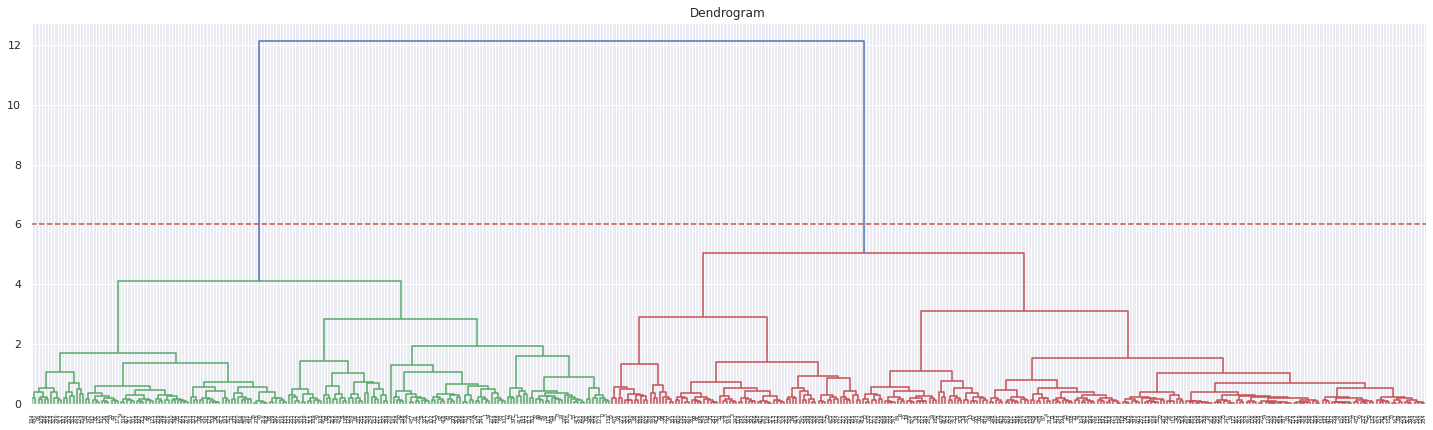

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))  
plt.title("Dendrogram")
plt.xticks(rotation=90)  

dendrogram = shc.dendrogram(shc.linkage(df_scaled, method='ward')) # cuidado com o nome
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


# Metrics

**Silhouette** é uma medida sobre a formação de aglomerados. É um valor entre $[0,1]$ em que valores mais próximos de 1 representam agrupamentos melhores. 

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
from sklearn import metrics
print(clf.labels_)

labels = clf.labels_
metrics.silhouette_score(df, labels, metric='euclidean')

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1]


0.25160752437887995

In [ ]:
for n_clusters in range(2,8):
  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  cluster.fit_predict(df_scaled)
  labels = cluster.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(df, labels, metric='euclidean'))

Média do valor de Silhouette para  2  clusters:  0.26237975956382975
Média do valor de Silhouette para  3  clusters:  0.08940900155382848
Média do valor de Silhouette para  4  clusters:  0.062383744184481275
Média do valor de Silhouette para  5  clusters:  0.021538587335002815
Média do valor de Silhouette para  6  clusters:  -0.01100200301423722
Média do valor de Silhouette para  7  clusters:  -0.008537324398642257


O código abaixo não tem importância para você, apenas os gráficos. 


P, PP, centroids = kmeansL(X,k=2,pos=[2,8])
P, PP, centroids = kmeansL(X,k=2,pos=[2,18])
P, PP, centroids = kmeansL(X,k=2,pos=[5,18])
P, PP, centroids = kmeansL(X,k=2,pos=[12,15])

For n_clusters = 2 The average silhouette_score is : 0.5002245229760047
For n_clusters = 3 The average silhouette_score is : 0.4490241274990781
For n_clusters = 4 The average silhouette_score is : 0.3916603082929343
For n_clusters = 5 The average silhouette_score is : 0.3740244627808385
For n_clusters = 6 The average silhouette_score is : 0.36552543309244806


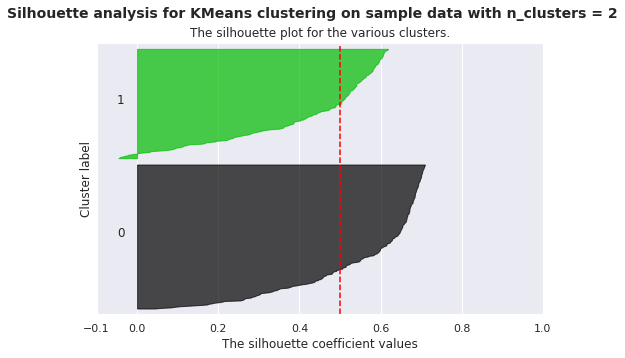

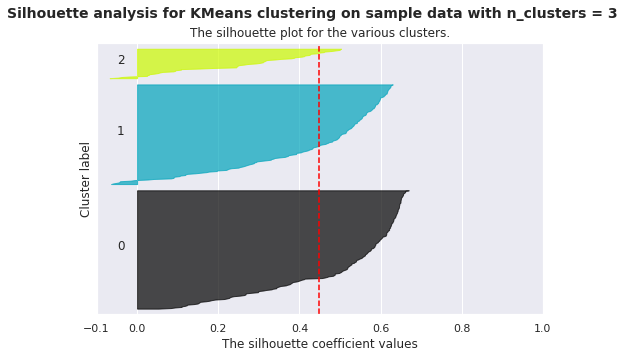

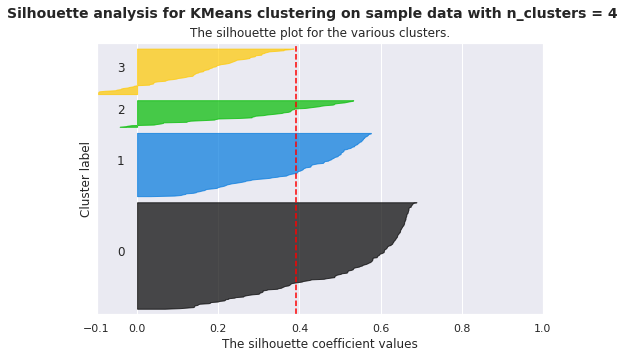

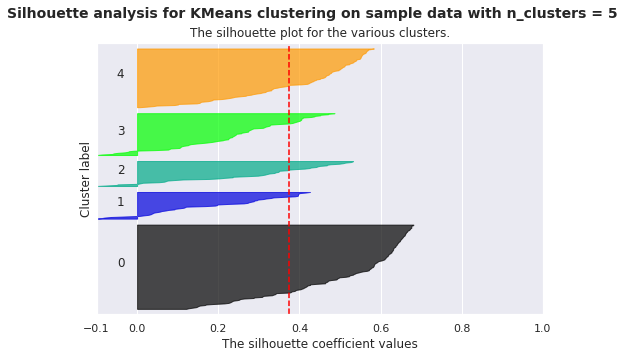

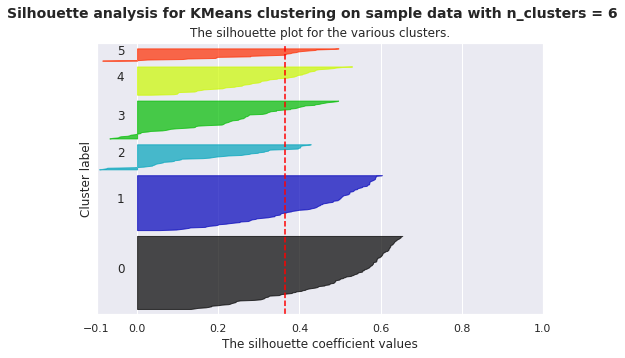

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_scaled

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Revendo o processo completo de Clusterização Hierárquica

Vamos considerar aqui a clusterização dos fornecedores somente com base nos seus produtos, excluindo assim o `Channel` e `Region`.

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
# Define os dados do modelo
X = df.drop(columns=['Channel','Region'])

# Normalização e outras preparações dos dados 
from sklearn.preprocessing import normalize 
X = normalize(X)

# Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  clf.fit_predict(df_scaled)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(X, labels, metric='euclidean'))

# Faz a clusterização selecionada

## Declara o modelo
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

## 'Treina' o modelo
clf.fit(df_scaled)

# Resultados
labels = clf.labels_
print(labels)

# Associando os dados
df['cluster'] = labels
print(df.head())



Média do valor de Silhouette para  2  clusters:  0.49090495412595425
Média do valor de Silhouette para  3  clusters:  0.4052855094264928
Média do valor de Silhouette para  4  clusters:  0.33043406585672813
Média do valor de Silhouette para  5  clusters:  0.2957297243811912
Média do valor de Silhouette para  6  clusters:  0.30400766625397696
Média do valor de Silhouette para  7  clusters:  0.31825241074724475
[1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

# Caracterizando os grupos

A seguir o mesmo processo de descoberta e *caracterização* realizado para o k-médias precisa ser feito para tornar os grupos úteis.

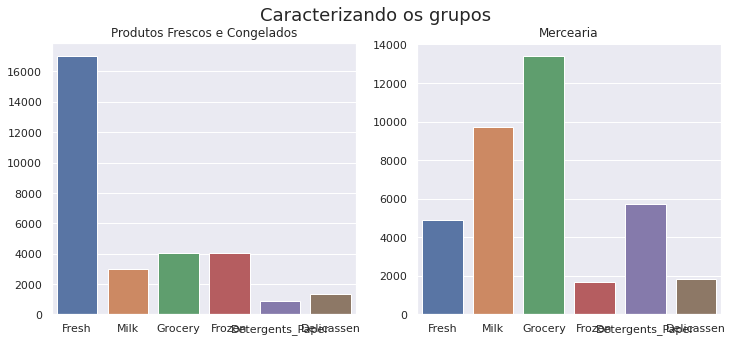

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = pd.DataFrame( df.drop(columns=['Channel','Region']).groupby('cluster').mean() ).reset_index()

f, axis = plt.subplots(1,2, figsize=(12,5))

sns.barplot(data=g[g.cluster==0].drop(columns='cluster'),ax=axis[0])
axis[0].set_title('Produtos Frescos e Congelados')
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'),ax=axis[1])
axis[1].set_title('Mercearia')
plt.suptitle('Caracterizando os grupos',fontsize=18)
plt.show()

# **Exercícios de Kmédias**




# Caso: **Segmentando Clientes de um Mall** 

Aqui você encontrará dados de 200 clientes de uma loja de Shopping com dados de idade, renda, sexo e score de gastos na loja. Você seguimentará esses clientes tentando obter e caracterizar grupos distintos de clientes para poder tomar decisões sobre como atuar sobre esses grupos (campanhas, ofertas de produtos etc.).

Os dados estão na URL: 'http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv'




# Exercício 1. Imports (**RESOLVIDO**)

Acrescente ao import básico das bibliotecas o import do `Kmeans` e do `StandardScaler` que será empregado para normalizar os valores. 

In [ ]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

# acrescente seus imports aqui
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Exercício 2. Acesse e explore os dados (**RESOLVIDO**)







In [ ]:
# Seu código

df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exercício 3. Definindo a entrada `X`

1. As entradas `X` do `kmeans` precisam ser numéricas pois ele emprega a média das distâncias dos elementos. Converta o atributo `Gender` numérico, com 'Male' = 1 e 'Female' = 0.

2. Além disso note que existe um atributo nos dados que não faz sentido ser incluído no modelo. Exclua esse atributo da entrada `X` para o treinamento.

In [ ]:
# Seu código




## Exercício 4. Normalize os dados `Scaling`

O `kmeans` emprega distâncias e, portanto, é sensível à escala dos dados. Normalize os dados de `X` com o método `StandardScaler()` ou a função `scale( )` (solução mais simples)\*. 

\* nota: o método precisa ser empregado sempre que quisermos 'persistir' ou empregar novamente a normalização aplicada para novos dados preservando essa transformação. Neste caso específico, não teremos necessidade de preservar essa transformação e podemos então apenas aplicar a função `scale()` que se mostra bastante mais simples.

In [ ]:
from sklearn.preprocessing import scale
X = scale(X)

Ótimo, seus dados agora devem aparecer todos com média 0 e desvio padrão 1.

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.636948e-16,-3.734387e-17,1.188443e-16,-4.213801e-17,5.677277e-19,-2.270911e-17,-1.362546e-16
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-1.792117e+00,-1.386752e+00,-1.550646e+00,-9.234447e-01,-9.182536e-01,-9.775535e-01,-5.579544e-01
25%,-9.521949e-01,-8.438467e-01,-9.345215e-01,-6.981479e-01,-7.813602e-01,-6.429862e-01,-5.579544e-01
50%,3.364046e-01,-2.533834e-01,-1.459929e-01,-3.638699e-01,-5.002813e-01,-2.824714e-01,-1.696051e-01
75%,9.411208e-01,6.886896e-01,9.008032e-01,2.900487e-01,7.102435e-01,3.392842e-01,2.354657e-01
max,1.153441e+00,2.860134e+00,2.106312e+00,3.783097e+00,5.142103e+00,6.201975e+00,1.632292e+01


## Exercício 5. Determine o número *ideal* de Clusters

O método da inércia ou regra do cotovelo, permite determinar o melhor número de cluster. Determine o número de cluster executando o código apresentado na teoria. Ele não precisa ser modificado se os dados de entradas estão corretamente em `X`. 

\*nota: existem outras métricas e critérios para decidir o número de Clusters. Algumas dependem do problema em questão (veja o problema de separar os grupos por idade para dois monitores em uma visita). Você ainda pode verificar o tamanho dos grupos evitando grupos muito grandes ou muito pequenos. E ainda existem métricas estatísticas como o `Silhouette`. Para os nossos propósitos, entretanto, será suficiente empregarmos a regra do cotovelo com base na inércia dos grupos.

In [ ]:
# Seu código

## Exercício 6. Segmentando os Grupos

Determinado o número (na dúvida o melhor número é o 3) vamos segmentar nossos clientes em 3 grupos. Não deixe de empregar o `random_state= 1984` na função `KMeans` para obter as mesmas respostas.

In [ ]:
# Seu código

## Exercício 7. Identifique o grupo de alguns clientes

Adicione um atributo `cluster` ao dataframe atribuindo os grupos `labels` obtidos acima para facilitar a identificação do grupo de cada cliente.

In [ ]:
# seu código aqui



A que grupos pertencem os clientes de ID 12, 34, 99?

In [ ]:
# seu código aqui


## Exercício 8. Caracterizando os grupos (**RESOLVIDO**)

Mas afinal, o que são esses grupos de clientes 0, 1, 2? O que pode estar diferenciando cada grupo?

Uma abordagem é olhar as médias dos valores desses grupos e observar no que um cliente médio de cada grupo se diferencia dos demais.

Empregue o modelo da teoria para exibir as médias dos valores de cada grupo e tente identificar que grupos de clientes estão sendo formados.

In [ ]:
g = pd.DataFrame( df.drop(columns='CustomerID').groupby('cluster').mean() ).reset_index()

f, axis = plt.subplots(1,3, figsize=(22,5))

sns.barplot(data=g[g.cluster==0].drop(columns='cluster'),ax=axis[0])
axis[0].set_title('Jovens de Alta renda')
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'),ax=axis[1])
axis[1].set_title('Idade Média Alto score')
sns.barplot(data=g[g.cluster==2].drop(columns='cluster'),ax=axis[2])
axis[2].set_title('Idade Média Baixo score')
plt.suptitle('Caracterizando os grupos',fontsize=18)
plt.show()

## Exercício 9. Utilizando os grupos 

* Cenário **A**. A loja, em uma campanha de marketing, quer então presentear aluguns clientes com algo score com produtos para cabelos brancos. Para qual grupo/grupos ela deveria enviar os produtos? 

* Cenário **B**. Ela ainda quer fazer uma oferta de produtos de celulares modernos e de luxo. Para qual grupo/grupos ela deveria ofertar esses produtos para maximizar sua chance de vendas?


## Exercício 10. HClust

Empregue o conjunto de dados anterior para fazer uma Clusterização Hierárquica, também com 3 clusters.

In [ ]:
# Seu código

## Exercício 11. Silhouette

Verifique o Silhouette do modelo anterior. Verifique também se a quantidade de 3 Clusters também corresponte ao melhor número de agrupamentos pela métrica Silhouette.

In [ ]:
# Seu código

## Exercício 12. HClust X KMeans

Os agrupamentos formados pelo HClust e Kmeans diferem em quantos elementos?

DICA: Empregue uma matriz de confusão para comparar os agrupamentos. Mas veja que os números dos grupos podem estar trocados (por exemplo o grupo 0 do Kmeans pode estar mais próximo do grupo 1 do HClust) e você deve considerar a coincidência máxima de elementos dos grupos. 


In [ ]:
# Seu código